# Aim: Over long periods of time, do markets perform significantly better/worse on some days of the week?

In [31]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from time import process_time
import scipy.stats

In [32]:
#I have used the Nifty Total Return Index as a proxy for the Indian markets. You can use any security from any country and run the code, the methodology will remain the same.

In [33]:
data=pd.read_excel(r'C:\Users\Vedant Wanchoo\Desktop\Recent Research\Day and Month Effect\Day_Effect.xlsx',sheet_name='Sheet3')

In [34]:
data['Ret']=data['NIFTY50 TRI'].pct_change()
data=data.dropna()

In [35]:
data.head()

,Date,NIFTY50 TRI,Ret
1,2000-01-03,1688.44,0.080311
2,2000-01-04,1737.75,0.029204
3,2000-01-05,1692.25,-0.026183
4,2000-01-06,1715.37,0.013662
5,2000-01-07,1710.81,-0.002658


In [36]:
data.shape

(5218, 3)

In [37]:
#This Cell takes 4 minutes to run

start_time = process_time()

data['Day']=0

for j in range(0,len(data)):
    data['Day'].iloc[j]=data['Date'].iloc[j].strftime('%A')
    
print ((process_time()-start_time)/60, "minutes")

3.1861979166666665 minutes


In [38]:
data.head()

,Date,NIFTY50 TRI,Ret,Day
1,2000-01-03,1688.44,0.080311,Monday
2,2000-01-04,1737.75,0.029204,Tuesday
3,2000-01-05,1692.25,-0.026183,Wednesday
4,2000-01-06,1715.37,0.013662,Thursday
5,2000-01-07,1710.81,-0.002658,Friday


In [39]:
Pivot=data.pivot_table(index='Date',columns='Day', values='Ret')
Pivot.head()

Day,Friday,Monday,Thursday,Tuesday,Wednesday
Date,,,,,
2000-01-03,NaN,0.080311,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,0.029204,NaN
2000-01-05,NaN,NaN,NaN,NaN,-0.026183
2000-01-06,NaN,NaN,0.013662,NaN,NaN
2000-01-07,-0.002658,NaN,NaN,NaN,NaN


In [40]:
Pivot.describe()

Day,Friday,Monday,Thursday,Tuesday,Wednesday
count,1043.000000,1044.000000,1043.000000,1044.000000,1044.000000
mean,0.000560,0.000410,0.000459,0.000178,0.001176
std,0.014781,0.015960,0.012692,0.013233,0.013028
min,-0.122021,-0.122389,-0.067665,-0.069495,-0.061799
25%,-0.005971,-0.005878,-0.005954,-0.005273,-0.005004
50%,0.000156,0.000272,0.000232,0.000013,0.000208
75%,0.008009,0.007377,0.007376,0.006607,0.006875
max,0.071719,0.177449,0.063213,0.082979,0.068659


In [41]:
Pivot=Pivot.reset_index()

In [42]:
Pivot.head()

Day,Date,Friday,Monday,Thursday,Tuesday,Wednesday
0,2000-01-03,NaN,0.080311,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,0.029204,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,-0.026183
3,2000-01-06,NaN,NaN,0.013662,NaN,NaN
4,2000-01-07,-0.002658,NaN,NaN,NaN,NaN


In [43]:
Fri=Pivot.iloc[:,1:2]
Fri=Fri.dropna()
Fri=Fri.reset_index()
Fri=Fri.iloc[:,1:2]

Mon=Pivot.iloc[:,2:3]
Mon=Mon.dropna()
Mon=Mon.reset_index()
Mon=Mon.iloc[:,1:2]

Thu=Pivot.iloc[:,3:4]
Thu=Thu.dropna()
Thu=Thu.reset_index()
Thu=Thu.iloc[:,1:2]

Tue=Pivot.iloc[:,4:5]
Tue=Tue.dropna()
Tue=Tue.reset_index()
Tue=Tue.iloc[:,1:2]

Wed=Pivot.iloc[:,5:6]
Wed=Wed.dropna()
Wed=Wed.reset_index()
Wed=Wed.iloc[:,1:2]

In [44]:
Alldata = pd.concat([Mon['Monday'],Tue['Tuesday'],Wed['Wednesday'],Thu['Thursday'],Fri['Friday']],axis=1)

In [45]:
Alldata.tail()

,Monday,Tuesday,Wednesday,Thursday,Friday
1039,-0.000651,-0.004482,0.004086,-0.002062,-0.008062
1040,0.001342,-0.006721,0.004498,0.005180,0.009595
1041,-0.002707,0.009213,0.004653,0.003160,0.000989
1042,-0.000740,-0.003928,0.000000,-0.007207,0.009836
1043,0.000819,-0.007132,0.001158,NaN,NaN


In [46]:
Alldata=Alldata.dropna()
Alldata.tail()

,Monday,Tuesday,Wednesday,Thursday,Friday
1038,0.013373,-0.002984,0.005233,0.004168,-0.007825
1039,-0.000651,-0.004482,0.004086,-0.002062,-0.008062
1040,0.001342,-0.006721,0.004498,0.005180,0.009595
1041,-0.002707,0.009213,0.004653,0.003160,0.000989
1042,-0.000740,-0.003928,0.000000,-0.007207,0.009836


In [47]:
Alldata.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000409,0.000185,0.001176,0.000459,0.000560
std,0.015967,0.013237,0.013034,0.012692,0.014781
min,-0.122389,-0.069495,-0.061799,-0.067665,-0.122021
25%,-0.005881,-0.005249,-0.005005,-0.005954,-0.005971
50%,0.000267,0.000025,0.000205,0.000232,0.000156
75%,0.007387,0.006607,0.006878,0.007376,0.008009
max,0.177449,0.082979,0.068659,0.063213,0.071719


In [48]:
# All the possible day difference combinations are: (Mon-Tue, Mon-Wed, Mon-Thu, Mon-Fri, Tue-Wed, Tue-Thu, Tue-Fri, Wed-Thu, Wed-Fri, Thu-Fri)

#In the formula below, I have selected every combination of days and tried to find out if there is a statistically significant difference (two sample t test)

In [49]:
for i in range(0,4):
    for j in range (i+1,5):
        print(scipy.stats.ks_2samp(Alldata.iloc[:,i],Alldata.iloc[:,j]))

Ks_2sampResult(statistic=0.03930968360498566, pvalue=0.3891547280799519)
Ks_2sampResult(statistic=0.04602109300095879, pvalue=0.2141002439985796)
Ks_2sampResult(statistic=0.02780441035474593, pvalue=0.8097040383319704)
Ks_2sampResult(statistic=0.025886864813039256, pvalue=0.8716185084886382)
Ks_2sampResult(statistic=0.03547459252157237, pvalue=0.5206790321734491)
Ks_2sampResult(statistic=0.04602109300095869, pvalue=0.21410024399858157)
Ks_2sampResult(statistic=0.05465004793863848, pvalue=0.08576627551079939)
Ks_2sampResult(statistic=0.029721955896452545, pvalue=0.7402150900931711)
Ks_2sampResult(statistic=0.045062320230105465, pvalue=0.23465910212747337)
Ks_2sampResult(statistic=0.029721955896452545, pvalue=0.7402150900931711)


# Conclusion: The return on a particular day of the week is not statistically different from any other day of the week. (This doesn't mean that they are exactly the same, they are just not stastically different)

<BarContainer object of 5 artists>

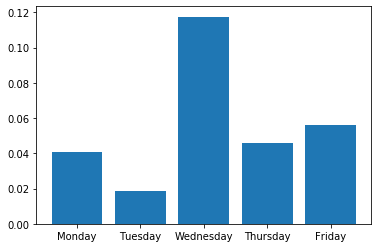

In [50]:
plt.bar(Alldata.columns,Alldata.mean()*100)